In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from pettingzoo.classic import go_v5
from SMPyBandits import Policies
from torch.utils.tensorboard import SummaryWriter
import warnings
import torch
from torch import nn
import torch.nn.functional as F
import random
import itertools

If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments


In [2]:
def fixedMOSSEcomputeAllIndex(self):
    """ Compute the current indexes for all arms, in a vectorized manner."""
    pulls_of_suboptimal_arms = np.sum(self.pulls[self.pulls < np.sqrt(self.t)])
    if pulls_of_suboptimal_arms > 0:
        indexes = (self.rewards / self.pulls) + np.sqrt(0.5 * np.maximum(0, np.log(self.t / pulls_of_suboptimal_arms)) / self.pulls)
    else:
        indexes = (self.rewards / self.pulls) + np.sqrt(0.5 * np.maximum(0, np.log(self.t / (self.nbArms * self.pulls))) / self.pulls)
    # indexes[self.pulls < 1] = float('+inf')
    self.index[:] = indexes
Policies.MOSSExperimental.computeAllIndex = fixedMOSSEcomputeAllIndex

Simple Multi-Armed Bandit

In [10]:
# meta_policy = Policies.UCB(len(policy_algorithm_list))
# squares = np.zeros(len(policy_algorithm_list))
regrets = []
while True:
    # meta_choice = meta_policy.choice()
    # meta_choice = np.argmin(meta_policy.pulls)
    # print(f'choice:{meta_choice}')
    # policy_algorithm = Policies.Thompson()
    num_arms = 10
    num_fictitious_pulls = 1000
    random_fictitious = False
    if random_fictitious:
        fictitious_pulls = np.random.dirichlet(num_arms*[1])*num_fictitious_pulls
        fictitious_empirical_means = np.random.random(num_arms)
    else:
        fictitious_pulls = np.array(num_arms*[0])
        fictitious_empirical_means = np.array(num_arms*[0])

    # print(fictitious_pulls)

    fictitious_rewards = fictitious_pulls * fictitious_empirical_means
    # print(fictitious_rewards)
    # policy = Policies.UCBoost_bq_h_lb(num_arms)
    policy = Policies.Thompson(num_arms)
    # policy = CPUCB(num_arms)
    # policy = klUCB(num_arms)
    policy.pulls = fictitious_pulls
    # print(policy.pulls)
    policy.rewards = fictitious_rewards
    # true_probs = np.random.random(num_arms)
    # true_probs = np.array([.5]* num_arms)
    true_probs = scipy.stats.beta.rvs(50,50,size=num_arms)
    # print(true_probs)

    for i in range(10000):
        # print(policy.index)
        action = policy.choice()
        reward = np.random.binomial(1,true_probs[action])
        policy.getReward(action, reward)
        # policy.pulls[action]+=1
        # policy.rewards[action]+=reward
        # print(action,reward)
        # print(policy.pulls)
        # policy.computeAllIndex()
    # print(true_probs)
    # print(true_probs.round(4))
    print('pulls:')
    print(policy.pulls)
    print('rewards:')
    print(policy.rewards)
    # print(policy.rewards/policy.pulls)
    regret = policy.pulls.sum()*true_probs.max()-(policy.pulls*true_probs).sum()
    print(f'regret:{regret}')
    regrets.append(regret)
    # meta_policy.getReward(meta_choice, -regret)
    # squares[meta_choice]+=regret**2
    # print('meta mean rewards')
    # print(meta_policy.rewards/(meta_policy.pulls+.0001))
    # print('meta pulls:')
    # score = -meta_policy.rewards/(meta_policy.pulls+.0001)
    # stdev = np.sqrt(squares/(meta_policy.pulls+.0001)-score**2)
    # mean_stdev = stdev/np.sqrt((meta_policy.pulls+.0001))
    # print((pd.DataFrame({'Name':policy_algorithm_names, 'score': score, 'mean stdev': mean_stdev, 'stdev': stdev, 'pulls': meta_policy.pulls})).sort_values(by='score'))

pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:
[0 0 0 0 0 0 0 0 0 0]
rewards:
[0 0 0 0 0 0 0 0 0 0]
regret:0.0
pulls:

KeyboardInterrupt: 

In [39]:
regrets = []
for i in range(483):
    true_probs = scipy.stats.beta.rvs(50,50,size=num_arms)
    policy = Policies.Thompson(10,a=50, b=50)
    pulls = np.zeros(10)
    rewards = np.zeros(10)
    for i in range(10000):
        action = policy.choice()
        reward = np.random.binomial(1,true_probs[action])
        pulls[action]+=1
        rewards[action]+=reward
        policy.getReward(action, reward)
    regret = np.max(true_probs)*10000-pulls.dot(true_probs)
    print(regret)
    regrets.append(regret)

204.22217900628766
130.09794541547762
141.14480243141043
220.13176553208814
83.61884535430727
143.67714512046496
82.67412308454277
156.709309555039
106.10733153586898
107.18788023666639
141.24903877239103
129.16725609033347
197.3064657870582
140.44896350071394
182.01599708096273
98.33726547290098
139.63520359241102
89.59259847075555
118.06222164834799
137.918016224834
84.76079616848983
124.85843655200097
202.1372655963969
209.0462400101096
145.07147193480705
233.944145394139
75.30603072733447
93.74992572719111
125.40162650051934
99.80823847078955
116.90888741002254
174.1584988976847
129.27587670614503
197.93485666810557
247.04739041534594
175.2820219822006
107.16453450849167
189.71686940084055
97.527963980182
133.65936175401293
138.79038653908265
107.32253400210902
171.84007291420494
206.4513840620757
179.8621091931609
123.37248198392172
131.34812090601008
265.38823531055914
65.90126716585019
243.73731281402252
153.98560158159944
69.74209153349511
228.37497165651985
215.0157331436103
7

In [40]:
regrets = np.array(regrets)

In [41]:
regrets.mean()

156.06815932774262

In [42]:
regrets.std()/np.sqrt(len(regrets))

3.1111476964354217

In [26]:
policy.rewards

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
policy_algorithm_list = [Policies.ProbabilityPursuit, Policies.EmpiricalMeans, Policies.UCB, Policies.UCBmin, Policies.UCBplus, Policies.UCBVtuned, Policies.MOSS, Policies.MOSSAnytime, Policies.MOSSExperimental, Policies.klUCB, Policies.klUCBloglog, Policies.klUCBPlus, Policies.klUCBswitchAnytime, Policies.DMED, Policies.DMEDPlus, Policies.AdBandits, Policies.LM_DSEE, Policies.BESA]

In [ ]:
policy_algorithm_names = ['ProbabilityPursuit', 'EmpiricalMeans', 'UCB', 'UCBmin', 'UCBplus', 'UCBVtuned', 'MOSS', 'MOSSAnytime', 'MOSSExperimental', 'klUCB', 'klUCBloglog', 'klUCBPlus', 'klUCBswitchAnytime', 'DMED', 'DMEDPlus', 'AdBandits', 'LM_DSEE', 'BESA']

In [ ]:
(pd.DataFrame({'Name':policy_algorithm_names, 'score': -meta_policy.rewards/(meta_policy.pulls+.0001), 'pulls': meta_policy.pulls})).sort_values(by='score')

In [ ]:
benchmark(policy_algorithm_list[0])

In [ ]:
results = []
for i in range(len(policy_algorithm_list)):
    try:
        results.append(benchmark(policy_algorithm_list[i]))
    except:
        results.append(f'fail:{i}')

Multi-Armed Bandit Trees

Synthetically-Generated Tree-based Games

In [3]:
class Node():
    def __init__(self, mean, game_length, depth, num_arms):
        self.mean = mean
        self.game_length = game_length
        self.depth = depth
        self.num_arms = num_arms
        self.policy = klUCBPlus(num_arms)
        self.fictitious_pulls = np.array(num_arms*[1])
        self.fictitious_rewards = np.array(num_arms*[0])
        self.policy.pulls = self.fictitious_pulls.copy()
        self.policy.rewards = self.fictitious_rewards.copy()
        if game_length == depth:
            self.action_means = scipy.stats.bernoulli.rvs(self.mean, size=num_arms)
        else:
            self.action_means = scipy.stats.beta.rvs(self.mean*9+.001,(1-self.mean)*9+.001,size=num_arms)
            # self.action_means = self.action_means*self.mean/self.action_means.mean()
        self.next_nodes = {}

In [ ]:
size = 25
root_node = Node(mean=.5, game_length = size, depth = 1, num_arms = size)
writer = SummaryWriter()
reward_list = []
big_number = 1e10
win_condition = 100
i = 0
while True:
    node=root_node
    node_action_list = []
    while True:
        action = node.policy.choice()
        node_action_list.append((node,action))
        if node.depth == node.game_length:
            reward = node.action_means[action]
            writer.add_scalar('Reward', reward, str(i))
            reward_list.append(reward)
            break
        else:
            node = node.next_nodes.setdefault(action, Node(mean=node.action_means[action], game_length=node.game_length, depth=node.depth+1, num_arms=node.num_arms))
    node_solved = False
    for node, action in reversed(node_action_list):
        if node_solved !=0:
            node.policy.pulls[action] = -node_solved * big_number
            node.fictitious_rewards[action] 
            node.policy.pulls[action] +=1
        else:
            node.policy.getReward(action, (reward if node.depth%2 else 1-reward))
        node_solved = 1 if any((node.policy.rewards==big_number)==(node.policy.pulls==big_number)) else (-1 if all(node.policy.rewards==-big_number) else 0)
    if node_action_list[-1][0].depth % 2 == reward:
        node_action_list[-2][0].policy.rewards[node_action_list[-2][1]] = -big_number
    if len(reward_list)>win_condition and ((np.array(reward_list[-win_condition:])==1).all() or (np.array(reward_list[-win_condition:])==0).all()):
        break
    i +=1
print(i)

Go

In [3]:
class GoNode():
    def __init__(self, num_arms, legal_actions, policy_algorithm, player='black_0', state=None, fictitious_alphas = None, fictitious_betas = None):
        self.num_arms = num_arms
        self.legal_actions = legal_actions
        self.player = player
        self.state = state
        self.policy_algorithm = policy_algorithm
        self.policy = self.policy_algorithm(num_arms)
        if fictitious_alphas == None and fictitious_betas == None:
            self.fictitious_pulls = np.ones(num_arms)
            self.fictitious_rewards = np.ones(num_arms) / 2
        else:
            self.fictitious_pulls = fictitious_alphas + fictitious_betas
            self.fictitious_rewards = fictitious_alphas
        self.policy.pulls = self.fictitious_pulls.copy()
        self.policy.rewards = self.fictitious_rewards.copy()
        self.policy.t = self.policy.pulls.sum()
        self.next_nodes = {}

In [ ]:
policy_algorithm_list

In [5]:
def benchmark(policy_algorithm):
    env = go_v5.env(board_size = 3, komi = 3.5)
    env.reset(seed=42)
    root_node = GoNode(num_arms = env.last()[0]['action_mask'].sum(), legal_actions = env.last()[0]['action_mask'].nonzero()[0], policy_algorithm=policy_algorithm)
    winner_list = []
    unique_nodes = 0
    big_number = 1e10
    win_condition = 100
    i = 0
    while True:
        node = root_node
        node_action_list = []
        observation, reward, termination, truncation, info = env.last()
        mask = observation["action_mask"]
        for agent in env.agent_iter():
            if termination or truncation:
                action = None
                winner = reward if agent=='black_0' else -reward
                winner = (winner + 1)/2
                winner_list.append(winner)
                break
            policy_choice = node.policy.choice()
            action = node.legal_actions[policy_choice]
            node_action_list.append((node,policy_choice))
            env.step(action)
            observation, reward, termination, truncation, info = env.last()
            mask = observation["action_mask"]
            if policy_choice not in node.next_nodes:
                unique_nodes +=1
            node = node.next_nodes.setdefault(policy_choice, GoNode(num_arms=np.count_nonzero(observation['action_mask']), legal_actions = mask.nonzero()[0], policy_algorithm=policy_algorithm, player = 'white_0' if node.player=='black_0' else 'black_0'))
        env.close()

        if {'black_0':1,'white_0':0}[node_action_list[-1][0].player] == winner:
            node_solved=-1
        else:
            node_solved=1
        for node, action in reversed(node_action_list):
            if node_solved !=0:
                # node.policy.rewards[action] = -node_solved * big_number
                # node.policy.pulls[action] +=1
                # node.policy.t +=1
                node.policy.getReward(action, -node_solved*big_number)
            else:
                node.policy.getReward(action, (winner if node.player=='black_0' else 1-winner))
            node_solved = 1 if any(node.policy.rewards==big_number) else (-1 if all(node.policy.rewards==-big_number) else 0)
        
        if len(winner_list)>win_condition and ((np.array(winner_list[-win_condition:])==1).all() or (np.array(winner_list[-win_condition:])==0).all()):
            break
        env.reset(seed=42)
        i+=1
    return unique_nodes

In [ ]:
klUCBPlus_benchmark_results = []
MOSSExperimental_benchmark_results = []
while True:
    if len(klUCBPlus_benchmark_results) <= len(MOSSExperimental_benchmark_results):
        result = benchmark(Policies.klUCBPlus)
        klUCBPlus_benchmark_results.append(result)
        print(f'klUCBPlus: {result}')
    else:
        result = benchmark(Policies.MOSSExperimental)
        MOSSExperimental_benchmark_results.append(result)
        print(f'MOSSExperimental: {result}')
    print(len(klUCBPlus_benchmark_results), len(MOSSExperimental_benchmark_results))
    # bins = np.linspace(min(klUCBPlus_benchmark_results+MOSSExperimental_benchmark_results), max(klUCBPlus_benchmark_results+MOSSExperimental_benchmark_results), 20)
    # plt.hist(klUCBPlus_benchmark_results, bins,alpha=.5)
    # plt.hist(MOSSExperimental_benchmark_results, bins, alpha=.5)
    # plt.show()

(array([ 1.,  1.,  2.,  3., 14.,  9.,  9.,  8.,  3.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([115066.        , 123648.51282051, 132231.02564103, 140813.53846154,
        149396.05128205, 157978.56410256, 166561.07692308, 175143.58974359,
        183726.1025641 , 192308.61538462, 200891.12820513, 209473.64102564,
        218056.15384615, 226638.66666667, 235221.17948718, 243803.69230769,
        252386.20512821, 260968.71794872, 269551.23076923, 278133.74358974,
        286716.25641026, 295298.76923077, 303881.28205128, 312463.79487179,
        321046.30769231, 329628.82051282, 338211.33333333, 346793.84615385,
        355376.35897436, 363958.87179487, 372541.38461538, 381123.8974359 ,
        389706.41025641, 398288.92307692, 406871.43589744, 415453.94871795,
        424036.46153846, 432618.97435897, 441201.48717949, 449784.        ]),
 <BarContainer ob

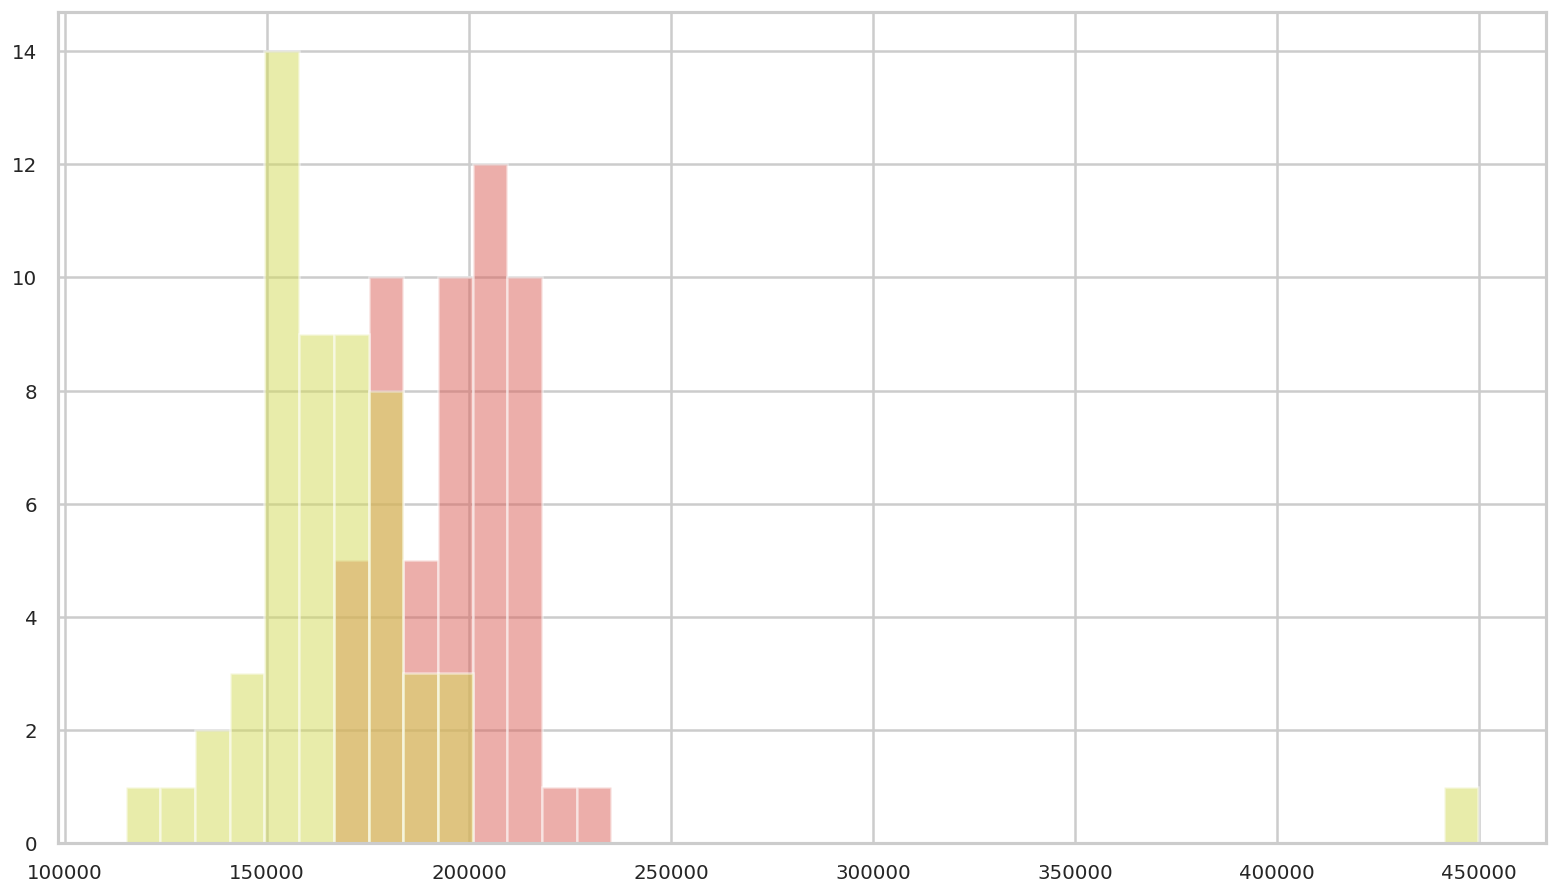

In [ ]:
bins = np.linspace(min(klUCBPlus_benchmark_results+MOSSExperimental_benchmark_results), max(klUCBPlus_benchmark_results+MOSSExperimental_benchmark_results), 40)
plt.hist(klUCBPlus_benchmark_results, bins,alpha=.5)
plt.hist(MOSSExperimental_benchmark_results, bins, alpha=.5)

In [ ]:
c = np.array([1,1,1,0,0])
d = np.array([0,0,1,1,1])
(c==1)==(d==1)

array([False, False,  True, False, False])

In [4]:
def pull_data(node):
    states = [node.state]
    num_arms = len(root_node.state[0].flatten())+1
    a = np.zeros(num_arms)
    a[node.legal_actions] = node.policy.rewards
    alphas = [a]
    p = np.zeros(num_arms)
    p[node.legal_actions] = node.policy.pulls
    betas = [p-a]
    for next_node in node.next_nodes.values():
        next_states, next_alphas, next_betas = pull_data(next_node)
        states += next_states
        alphas += next_alphas
        betas += next_betas
    return states, alphas, betas

In [5]:
writer = SummaryWriter()
env = go_v5.env(board_size = 5, komi = 3.5)
policy_algorithm=Policies.MOSSExperimental
env.reset(seed=42)
last = env.last()
root_node = GoNode(num_arms = last[0]['action_mask'].sum(), legal_actions = last[0]['action_mask'].nonzero()[0], policy_algorithm=policy_algorithm, state = last[0]['observation'].transpose((2,1,0)))
winner_list = []
big_number = 1e10
win_condition = 100
i = 0
using_network=False
states_per_training_batch = 200000
num_unique_states_visited = 1
# data collection and training loop
while True:
    # data collection and tree update loop
    while num_unique_states_visited < states_per_training_batch:
        print(num_unique_states_visited)
        node = root_node
        node_action_list = []
        observation, reward, termination, truncation, info = env.last()
        state = observation['observation'].transpose((2,1,0))
        mask = observation["action_mask"]
        # single game playout loop
        for agent in env.agent_iter():
            if termination or truncation:
                action = None
                winner = reward if agent=='black_0' else -reward
                winner = (winner + 1)/2
                winner_list.append(winner)
                writer.add_scalar('Winner', winner, str(i))
                break
            policy_choice = node.policy.choice()
            action = node.legal_actions[policy_choice]
            node_action_list.append((node,policy_choice))
            env.step(action)
            observation, reward, termination, truncation, info = env.last()
            state = observation['observation'].transpose((2,1,0))
            mask = observation["action_mask"]
            num_arms = np.count_nonzero(mask)
            if policy_choice in node.next_nodes:
                node = node.next_nodes[policy_choice]
            else:
                fictitious_alphas, fictitious_betas = network(state) if using_network else (None, None)
                node.next_nodes[policy_choice] = GoNode(num_arms=num_arms, 
                                                        legal_actions = mask.nonzero()[0], 
                                                        policy_algorithm=policy_algorithm if num_arms > 3 else Policies.klUCBPlus, 
                                                        player = 'white_0' if node.player=='black_0' else 'black_0', 
                                                        state=state,
                                                        fictitious_alphas = fictitious_alphas,
                                                        fictitious_betas = fictitious_betas)
                num_unique_states_visited += 1
                node = node.next_nodes[policy_choice]
        env.close()

        if {'black_0':1,'white_0':0}[node_action_list[-1][0].player] == winner:
            node_solved=-1
        else:
            node_solved=1
        # tree update loop
        for node, action in reversed(node_action_list):
            if node_solved !=0:
                node.policy.rewards[action] = big_number if node_solved==-1 else .5
                node.policy.pulls[action]=big_number
                # node.policy.pulls[action] +=1
            else:
                node.policy.getReward(action, (winner if node.player=='black_0' else 1-winner))
            node_solved = 1 if any(node.policy.rewards==big_number) else (-1 if (all(node.policy.rewards==.5) and all(node.policy.pulls==big_number)) else 0)
        
        # if len(winner_list)>win_condition and ((np.array(winner_list[-win_condition:])==1).all() or (np.array(winner_list[-win_condition:])==0).all()):
        #     break
        if any(root_node.policy.rewards==big_number):
            break
        env.reset(seed=42)

    states, target_alphas, target_betas = pull_data(root_node)
    if not using_network:
        network = Net(5)
        using_network = True
    train(network, states, target_alphas, target_betas)


1
22
47
102
141
169
191
222
244
266
329
370
396
423
455
487
520
616
659
686
710
757
795
823
862
887
934
978
999
1061
1108
1132
1156
1181
1219
1311
1338
1378
1423
1469
1502
1554
1607
1697
1741
1772
1810
1839
1863
1915
1951
1971
2000
2008
2056
2092
2140
2241
2299
2340
2363
2385
2415
2441
2493
2581
2617
2645
2680
2737
2777
2810
2845
2884
2909
2950
2982
3003
3028
3070
3097
3136
3159
3223
3254
3285
3307
3357
3385
3463
3494
3505
3548
3578
3602
3622
3668
3695
3758
3792
3822
3834
3863
3893
3914
3956
4021
4061
4089
4129
4169
4250
4301
4346
4369
4398
4436
4467
4517
4538
4629
4673
4709
4756
4784
4857
4901
4927
4979
5020
5069
5122
5168
5203
5247
5262
5302
5345
5391
5394
5441
5460
5490
5533
5543
5587
5642
5670
5709
5759
5790
5817
5837
5871
5894
5919
5968
5996
6027
6049
6098
6116
6151
6182
6207
6249
6278
6323
6433
6450
6474
6495
6510
6532
6585
6617
6644
6670
6720
6751
6776
6807
6834
6873
6903
6927
6957
6980
7027
7114
7165
7222
7264
7310
7349
7376
7408
7441
7465
7486
7524
7550
7608
7630
7673
7700
773

NameError: name 'Net' is not defined

In [20]:
states, target_alphas, target_betas = pull_data(root_node)
target_alphas, target_betas = torch.FloatTensor(np.array(target_alphas)), torch.FloatTensor(np.array(target_betas))

In [21]:
target_alphas.size()

torch.Size([150007, 10])

In [22]:
states = torch.FloatTensor(np.array(states))
states.element_size()*states.nelement()

91804284

In [23]:
states.size()

torch.Size([150007, 17, 3, 3])

## Try different network architecture

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.ModuleList(
            [nn.Conv2d(17, 32, 3, 1, padding='same')] + \
            [nn.Conv2d(32, 32, 3, 1, padding='same') for i in range(2)] + \
            [nn.Conv2d(32, 2, 3, 1, padding='same')])

    def forward(self, x):
        for i in range(len(self.layers)-1):
            x = self.layers[i](x)
            x = F.relu(x)
        out = torch.flatten(self.layers[-1](x), -2, -1)
        passes = x[:,:2,:,:].mean(axis=(-1,-2))
        out = torch.cat((out, passes.unsqueeze(-1)), axis=-1)
        alphas = torch.exp(out[:,0,:])
        betas=torch.exp(out[:,1,:])
        return alphas, betas

In [12]:
root_node.next_nodes[0].policy.pulls

array([34., 58., 45., 60., 10.,  3.,  4., 19., inf])

In [38]:
def loss_mse(alphas, betas, target_alphas, target_betas):
    s=alphas+betas
    p_hat = alphas/(alphas+betas)
    return (target_alphas*(1-p_hat) + (target_alphas+target_betas)*p_hat**2 + alphas*betas/(s**2*(s+1))).mean()

In [7]:
def train(network, states, target_alphas, target_betas):
    optimizer = torch.optim.Adam(network.parameters(), lr=1e-4)
    batch_size = 1024

    train_target_alphas, test_target_alphas = torch.split(target_alphas, [int(len(target_alphas)*0.85), len(target_alphas) - int(len(target_alphas)*0.85)])
    train_target_betas,  test_target_betas = torch.split(target_betas, [int(len(target_betas)*0.85), len(target_betas) - int(len(target_betas)*0.85)])
    train_states, test_states = torch.split(states, [int(len(states)*0.85), len(states) - int(len(states)*0.85)])
    
    train_target_alpha_batches = torch.split(train_target_alphas, batch_size)
    train_target_beta_batches = torch.split(train_target_betas, batch_size)
    train_batches = torch.split(train_states, batch_size)
        
    for epoch in range(10):
        print(f'epoch:{epoch}')
        for i in range(len(train_batches)):
            optimizer.zero_grad()
            aug_train_inpt, aug_train_target_alpha, aug_train_target_beta = augment(train_batches[i], train_target_alpha_batches[i], train_target_beta_batches[i])
            alphas, betas = network(aug_train_inpt)
            
            # train_loss = loss_mse(alphas, betas, aug_train_target_alpha, aug_train_target_beta)
            train_loss = loss4(alphas, betas, aug_train_target_alpha, aug_train_target_beta)
            train_loss.backward()
            optimizer.step()
            if i % 40 == 0:
                print(train_loss.item())
        test_alphas, test_betas = network(test_states)
        # val_loss = loss_mse(test_alphas, test_betas, test_target_alphas, test_target_betas)
        val_loss = loss4(test_alphas, test_betas, test_target_alphas, test_target_betas)
        print(f'val loss:{val_loss}')

In [17]:
net = Net(5)
train(net, torch.FloatTensor(states), torch.FloatTensor(target_alphas), torch.FloatTensor(target_betas))

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_19982/3085595520.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  train(net, torch.FloatTensor(states), torch.FloatTensor(target_alphas), torch.FloatTensor(target_betas))


epoch:0


RuntimeError: split_with_sizes expects split_sizes to sum exactly to 26 (input tensor's size at dimension -1), but got split_sizes=[9, 1]

In [15]:
net=Net(5)

In [16]:
net.type

<bound method Module.type of Net(
  (layers): ModuleList(
    (0): Conv2d(17, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): Conv2d(16, 2, kernel_size=(3, 3), stride=(1, 1), padding=same)
  )
)>

## Loss function to choose + cross-validate loss and iterations and network architecture other inputs

In [12]:
class Net(nn.Module):
    def __init__(self, size):
        super(Net, self).__init__()
        if size == 1:
            self.layers = nn.ModuleList(
                [nn.Conv2d(17, 32, 3, 1, padding='same')] + \
                [nn.Conv2d(32, 32, 3, 1, padding='same')] + \
                [nn.Conv2d(32, 2, 3, 1, padding='same')])
        elif size == 2:
            self.layers = nn.ModuleList(
                [nn.Conv2d(17, 32, 3, 1, padding='same')] + \
                [nn.Conv2d(32, 32, 3, 1, padding='same') for _ in range(2)] + \
                [nn.Conv2d(32, 2, 3, 1, padding='same')])
        elif size == 3:
            self.layers = nn.ModuleList(
                [nn.Conv2d(17, 32, 3, 1, padding='same')] + \
                [nn.Conv2d(32, 32, 3, 1, padding='same') for _ in range(4)] + \
                [nn.Conv2d(32, 2, 3, 1, padding='same')])
        elif size == 4:
            self.layers = nn.ModuleList(
                [nn.Conv2d(17, 64, 3, 1, padding='same')] + \
                [nn.Conv2d(64, 32, 3, 1, padding='same')] + \
                [nn.Conv2d(32, 16, 3, 1, padding='same')] + \
                [nn.Conv2d(16, 2, 3, 1, padding='same')])
        elif size == 5:
            self.layers = nn.ModuleList(
                [nn.Conv2d(17, 128, 3, 1, padding='same')] + \
                [nn.Conv2d(128, 64, 3, 1, padding='same')] + \
                [nn.Conv2d(64, 32, 3, 1, padding='same')] + \
                [nn.Conv2d(32, 16, 3, 1, padding='same')] + \
                [nn.Conv2d(16, 2, 3, 1, padding='same')])

    def forward(self, x):
        for i in range(len(self.layers)-1):
            x = self.layers[i](x)
            x = F.relu(x)
        out = torch.flatten(self.layers[-1](x), -2, -1)
        passes = x[:,:2,:,:].mean(axis=(-1,-2))
        out = torch.cat((out, passes.unsqueeze(-1)), axis=-1)
        alphas = torch.exp(out[:,0,:])
        betas=torch.exp(out[:,1,:])
        return alphas, betas
    
def augment(inpt, target_alphas, target_betas):
    rotation = random.randrange(4)
    flip = random.randrange(2)
    alpha_board_targets , alpha_pass_targets = torch.split(target_alphas, [9,1], dim=-1)
    beta_board_targets , beta_pass_targets = torch.split(target_betas, [9,1], dim=-1)
    alpha_board_targets_reshaped = alpha_board_targets.view(-1, int(np.sqrt(alpha_board_targets.shape[-1])),int(np.sqrt(alpha_board_targets.shape[-1])))
    beta_board_targets_reshaped = beta_board_targets.view(-1, int(np.sqrt(beta_board_targets.shape[-1])),int(np.sqrt(beta_board_targets.shape[-1])))
    inpt = torch.rot90(inpt,rotation,[-2,-1])
    alpha_board_targets_reshaped = torch.rot90(alpha_board_targets_reshaped,rotation,[-2,-1])
    beta_board_targets_reshaped = torch.rot90(beta_board_targets_reshaped,rotation,[-2,-1])
    if flip:
        inpt = torch.flip(inpt, [-1])
        alpha_board_targets_reshaped = torch.flip(alpha_board_targets_reshaped, [-1])
        beta_board_targets_reshaped = torch.flip(beta_board_targets_reshaped, [-1])
    alpha_board_targets = alpha_board_targets_reshaped.reshape(-1, alpha_board_targets.shape[-1])
    beta_board_targets = beta_board_targets_reshaped.reshape(-1, beta_board_targets.shape[-1])
    alpha_targets = torch.cat((alpha_board_targets, alpha_pass_targets),-1).contiguous()
    beta_targets = torch.cat((beta_board_targets, beta_pass_targets),-1).contiguous()
    return inpt, alpha_targets, beta_targets

def loss1(target_alpha_batches, p_hat, s):
    # return (target_beta_batches*p_hat**2 + target_alpha_batches*(1-p_hat)**2 + p_hat*(1-p_hat)/(s+1)*pulls).mean()
    return (target_alpha_batches - target_alpha_batches*p_hat + p_hat*(1-p_hat)/(s+1)).mean()

def loss2(p_hat, target_probs):
    return ((p_hat-target_probs)**2).mean()

def loss3(target_beta_batches, target_alpha_batches, p_hat):
    return (target_beta_batches*p_hat**2 + target_alpha_batches*(1-p_hat)**2).mean()

def loss4(alphas, betas, target_alphas, target_betas):
    # return (target_alpha_batches*(torch.digamma(s)-torch.digamma(alphas))).mean()
    return ((target_alphas + target_betas)*torch.digamma(alphas+betas)-target_alphas*torch.digamma(alphas)-target_betas*torch.digamma(betas)).mean()

def tuning(network, loss_func):
    optimizer = torch.optim.Adam(network.parameters(), lr=1e-5)

    batch_size = 64
    
    train_target_alphas, val_target_alphas, test_target_alphas = torch.split(target_alphas, [int(len(target_alphas)*0.7), int(len(target_alphas)*0.15), int(len(target_alphas)*0.15) + 1])
    train_target_betas, val_target_betas, test_target_betas = torch.split(target_betas, [int(len(target_betas)*0.7), int(len(target_betas)*0.15), int(len(target_betas)*0.15) + 1])
    train_states, val_states, test_states = torch.split(states, [int(len(states)*0.7), int(len(states)*0.15), int(len(states)*0.15) + 1])
    
    train_target_alpha_batches = torch.split(train_target_alphas, batch_size)
    train_target_beta_batches = torch.split(train_target_betas, batch_size)
    train_batches = torch.split(train_states, batch_size)
    ma = 0
        
    for epoch in range(10):
        print(f'epoch:{epoch}')
        for i in range(len(train_batches)):
            optimizer.zero_grad()
            aug_train_inpt, aug_train_target_alpha, aug_train_target_beta = augment(train_batches[i], train_target_alpha_batches[i], train_target_beta_batches[i])
            alphas, betas = network(aug_train_inpt)

            s = alphas+betas
            p_hat = alphas/s
            
            pulls = aug_train_target_alpha + aug_train_target_beta
            target_probs = aug_train_target_alpha/pulls
            target_probs[target_probs != target_probs] = 0

            if loss_func == loss1:
                train_loss = loss1(aug_train_target_alpha, p_hat, s)
            elif loss_func == loss2:
                train_loss = loss2(p_hat, target_probs)
            elif loss_func == loss3:
                train_loss = loss3(aug_train_target_beta, aug_train_target_alpha, p_hat)
            elif loss_func == loss4:
                train_loss = loss4(aug_train_target_alpha, s, alphas)
            train_loss.backward()
            optimizer.step()
            if i % 500 == 0:
                print(train_loss.item())
    
    val_target_alpha_batches, val_target_beta_batches = torch.split(val_target_alphas, batch_size), torch.split(val_target_betas, batch_size)
    val_batches = torch.split(val_states, batch_size)
    val_batch_loss = []
    for i in range(len(val_batches)):
        optimizer.zero_grad()
        alphas, betas = network(val_batches[i])

        s = alphas+betas
        p_hat = alphas/s
        
        pulls = val_target_alpha_batches[i] + val_target_beta_batches[i]
        target_probs = val_target_alpha_batches[i]/pulls
        target_probs[target_probs != target_probs] = 0

        val_batch_loss += [loss1(val_target_alpha_batches[i], p_hat, s).item()]

    return val_batch_loss

In [33]:
val_losses = []
for architecture, loss_func in itertools.product(*[[Net(4), Net(5)],
                                     [loss1, loss2, loss3, loss4]]):
    val_losses.append(tuning(architecture, loss_func))

epoch:0
60630452.0
48854848.0
1409900.75
616084.8125
epoch:1
405921.625
309427.1875
12672.0
70352.0
epoch:2
39826.4921875
47073.6015625
1712.0
20929.599609375
epoch:3
7272.4609375
9352.0
105.5999984741211
4187.2001953125
epoch:4
2097.70947265625
2232.0
14.400001525878906
1446.4000244140625
epoch:5
444.60174560546875
545.5999755859375
1.6000003814697266
252.8000030517578
epoch:6
105.1297378540039
115.19999694824219
1.1043748315842095e-07
88.0
epoch:7
24.891721725463867
25.600000381469727
1.8675278212754165e-08
19.200000762939453
epoch:8
7.097105979919434
6.400000095367432
4.377292750490369e-09
1.600000023841858
epoch:9
0.5327978134155273
1.600000023841858
1.7229471183100031e-09
1.600000023841858
epoch:0
0.7375503778457642
0.7627139687538147
0.13172824680805206
0.061064936220645905
epoch:1
0.05830952525138855
0.053152717649936676
0.05693911388516426
0.05399118736386299
epoch:2
0.053607940673828125
0.051570404320955276
0.05299999192357063
0.051306672394275665
epoch:3
0.052617885172367096


In [37]:
for x in val_losses:
    print(sum(x)/352)

153.99594622799384
74293983.43181819
12140547.459894354
196.42863839046797
8.486364491161163
71264770.15269886
7045942.409224077
89.49095197485673


In [ ]:
best_i = 0
best_error = np.Inf
for i in range(len(val_losses)):
    if np.mean(val_losses[i]) < best_error:
        best_i = i
        best_error = np.mean(val_losses[i])
print(i)
print(best_error)

15
0.03682646167632673


In [41]:
import random

In [31]:
fake_target = torch.randn(64,10)

In [44]:
board_targets , pass_targets = torch.split(fake_target, [9,1], dim=-1)
board_targets_reshaped = board_targets.view(-1, int(np.sqrt(board_targets.shape[-1])),int(np.sqrt(board_targets.shape[-1])))

In [38]:
int(np.sqrt(board_targets.shape[-1]))

3

In [54]:
inpt = torch.zeros(64,17,3,3)
inpt[0,0,0,0]=1
targets = torch.zeros(64,10)
targets[0,0]=1

In [75]:
augment(inpt, targets)

torch.Size([64, 9])
torch.Size([64, 3, 3])


(tensor([[[[0., 0., 1.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          ...,
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]]],
 
 
         [[[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          ...,
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
 
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]]],
 
 
         [[[0., 0., 0.],

In [55]:
targets

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [ ]:
torch.split(a,64)[0].shape

torch.Size([64, 17, 4, 4])

In [ ]:
network(torch.FloatTensor(root_node.next_nodes[4].state).unsqueeze(0))

(tensor([[6.8608e+02, 1.6832e+04, 1.1194e+03, 1.9181e+04, 2.7628e+06, 5.2306e+04,
          1.6109e+03, 5.7940e+04, 3.1252e+03, 1.1940e+03]],
        grad_fn=<ExpBackward0>),
 tensor([[1.6154e-03, 7.8157e-05, 1.2027e-03, 5.5434e-05, 9.1532e-07, 9.0809e-05,
          8.8335e-04, 6.4726e-05, 2.0962e-03, 1.0000e+00]],
        grad_fn=<ExpBackward0>))

In [ ]:
root_node.next_nodes[4].state

array([[[ True, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, Fal